This notebook is to calculate the corelatino functin r of dark matter and gas in TNG simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import modify as mf
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=100, Om0=0.268, Tcmb0=2.725)

zstep=[5000,4724,4338,4098,3982,3656,3356,3080,2826,2593,2448,2378,2181,2000,1942,1780,1631,1494,1328,1216]
datadir="/home/chenzy/data/"
picdir="/home/chenzy/pic/"
filename="/home/chenzy/code/kSZ/1COMPRESS/zlist.txt"
filedata=np.loadtxt(filename,skiprows=1)
step2z=[]
for s in zstep:
	step2z.append(filedata[np.where(filedata[:,0]==s),2])
step2z=np.array(step2z).flatten()
print(step2z)
H=np.zeros(len(step2z))
D_c=np.zeros(len(step2z))
for i in range(len(step2z)):
	H[i]=cosmo.H(step2z[i]).value
	D_c[i]=cosmo.comoving_distance(step2z[i]).value
boxlen=1200.0
grid=512

import matplotlib.colors as colors
import matplotlib.cm as cmx
jet = plt.get_cmap('jet')
cNorm  = colors.Normalize(vmin=0, vmax=len(step2z))
scalarmap=cmx.ScalarMappable(norm=cNorm, cmap=jet)

print(2*np.pi/75)

[0.    0.058 0.151 0.218 0.253 0.364 0.485 0.616 0.76  0.916 1.028 1.087
 1.272 1.474 1.547 1.774 2.023 2.293 2.695 3.025]
0.08377580409572781


	 The range of k:  0.1451039491387374 ~ 34.28614242038039 h/Mpc
	 The range of k:  0.1451039491387374 ~ 34.28614242038039 h/Mpc
	 The range of k:  0.1451039491387374 ~ 34.28614242038039 h/Mpc
	 The range of k:  0.1451039491387374 ~ 34.28614242038039 h/Mpc
	 The range of k:  0.1451039491387374 ~ 34.28614242038039 h/Mpc


/opt/conda/conda-4.12.0/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


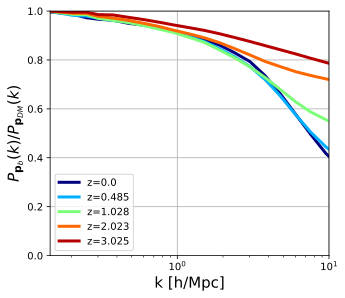

In [2]:
fig, ax = plt.subplots(figsize=(5,4.5))
for i in [0, 6, 10, 16, 19]:
	k,ampmom,themom=mf.get_ampthemom(step2z[i])
	colorVal = scalarmap.to_rgba(i)
	ax.plot(k,ampmom,c=colorVal,lw = 3, label="z="+str(step2z[i]))
	k_l=3000/D_c[i]
	#ax.plot([k_l,k_l],[0,1],':',c=colorVal,label="z="+str(step2z[i]))
	ax.set_xlim(k[0],10)
	ax.set_ylim(0,1)
	ax.legend()
ax.grid()
#d=np.pi/boxlen*512
#ax.plot([d,d],[0,1],"k")
#ax.text(d/1.1,1.01,"$512^3$")
#d=np.pi/boxlen*1024
#ax.plot([d,d],[0,1],"k")
#ax.text(d/1.1,1.01,"$1024^3$")
#d=np.pi/boxlen*2048
#ax.plot([d,d],[0,1],"k")
#ax.text(d/1.1,1.01,"$2048^3$")

ax.set_xscale("log")
ax.set_xlabel("k [h/Mpc]", fontsize = 15)
ax.set_ylabel("$P_{\mathbf{p}_b}(k)/P_{\mathbf{p}_{DM}}({k})$", fontsize = 15)
fig.savefig("figure/diff_ratio.pdf")

	 The range of k:  0.1451039491387374 ~ 34.28614242038039 h/Mpc
	 The range of k:  0.1451039491387374 ~ 34.28614242038039 h/Mpc
	 The range of k:  0.1451039491387374 ~ 34.28614242038039 h/Mpc
	 The range of k:  0.1451039491387374 ~ 34.28614242038039 h/Mpc
	 The range of k:  0.1451039491387374 ~ 34.28614242038039 h/Mpc


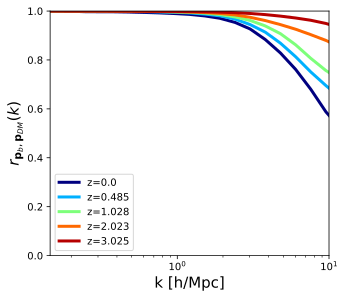

In [3]:
fig, ax = plt.subplots(figsize=(5,4.5))
for i in [0, 6, 10, 16, 19]:
	k,ampmom,themom=mf.get_ampthemom(step2z[i])
	r=np.exp(-themom**2/2)
	colorVal = scalarmap.to_rgba(i)
	plt.plot(k,r,c=colorVal, lw=3, label="z="+str(step2z[i]))
	plt.xlim(k[0],10)
	plt.ylim(0,1)

plt.legend(loc=3)

ax.set_xscale("log")
ax.set_xlabel("k [h/Mpc]", fontsize = 15)
ax.set_ylabel("$r_{\mathbf{p}_b,\mathbf{p}_{DM}}({k})$", fontsize = 15)
fig.savefig("figure/diff_r.pdf")